<a href="https://colab.research.google.com/github/Shegun93/Clustering_practice/blob/main/Stock_price_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the training set

In [ ]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:,1:2].values

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
SC = MinMaxScaler(feature_range=(0,1))
training_set_scaled = SC.fit_transform(training_set)
#creating data structure with 60 timestep and 1 output
x_train = []
y_train = []
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train, y_train = np.array(x_train),np.array(y_train)


### Creating a data structure with 60 timesteps and 1 output

### Reshaping

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 24s 105ms/step - loss: 0.0993
Epoch 2/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0046
Epoch 5/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0041
Epoch 7/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0049
Epoch 11/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0047
Epoch 12/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0041
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

In [ ]:
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = SC.transform(inputs)
x_test=[]
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = SC.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price

array([[780.8591 ],
       [778.3826 ],
       [778.3648 ],
       [779.46216],
       [782.48883],
       [788.0436 ],
       [793.49884],
       [796.2597 ],
       [797.09155],
       [796.9657 ],
       [796.5006 ],
       [795.8971 ],
       [795.4063 ],
       [795.67566],
       [796.5242 ],
       [800.7801 ],
       [807.44354],
       [814.954  ],
       [819.6862 ],
       [816.9458 ]], dtype=float32)

### Visualising the results

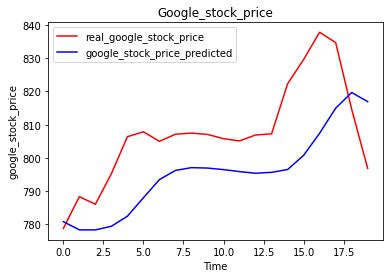

In [ ]:
plt.plot(real_stock_price, color='red', label='real_google_stock_price')
plt.plot(predicted_stock_price, color='blue', label='google_stock_price_predicted')
plt.title('Google_stock_price')
plt.xlabel('Time')
plt.ylabel('google_stock_price')
plt.legend()
plt.show()